# Sales Prediction using Python

In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("./Desktop/SIP/advertising.csv")
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df.shape

(200, 5)

In [5]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


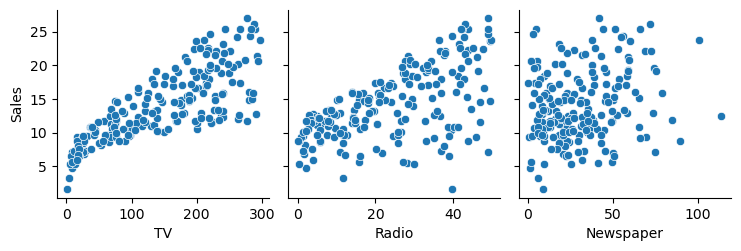

In [6]:
sns.pairplot(df, x_vars=['TV', 'Radio','Newspaper'], y_vars='Sales', kind='scatter')
plt.show()

**Pair Plot Observation :**
*When advertising cost increases in TV Ads the sales will increase as well. While the for newspaper and radio it is bit unpredictable.

<Axes: ylabel='Frequency'>

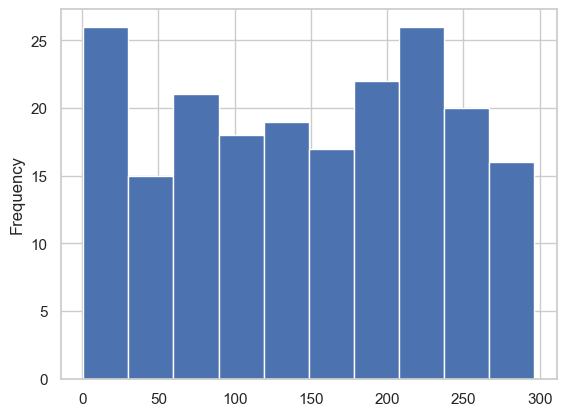

In [31]:
df['TV'].plot.hist(bins=10)

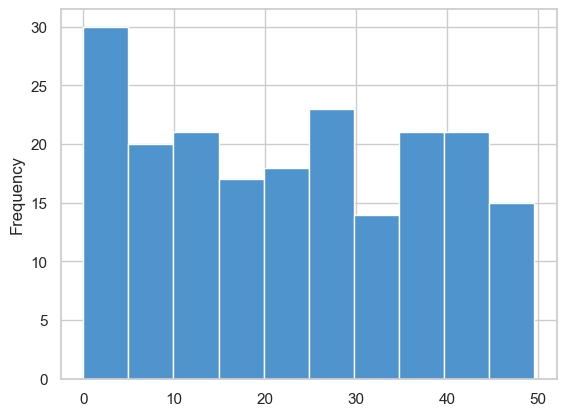

In [64]:
df['Radio'].plot.hist(color=["#4F94CD"], bins=10, xlabel="Radio");

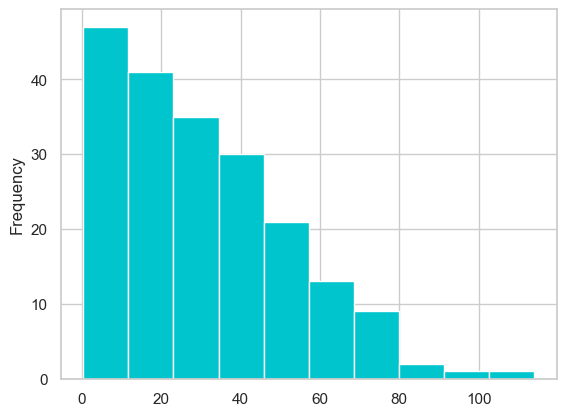

In [67]:
df['Newspaper'].plot.hist(color=["#00C5CD"],bins=10, xlabel="newspaper");

**Histogram Observation**

* The majority sales is the result of low advertising cost in newspaper

In [108]:
df = pd.read_csv("./Desktop/SIP/sales.csv")

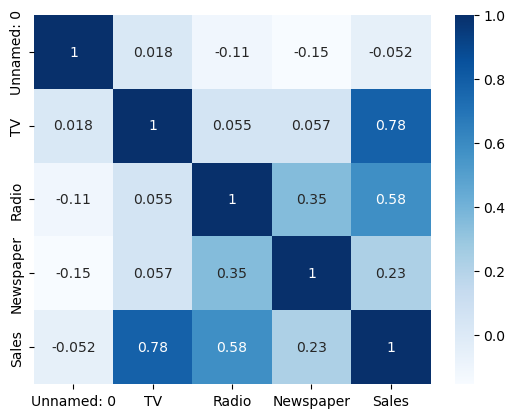

In [38]:
# Specify the colormap ('Blues' for shades of blue)

sns.heatmap(df.corr(), annot=True, cmap='Blues')
# plt.figure(figsize=(12, 10))
#sns.heatmap(df.corr(),annot = True)
plt.show()

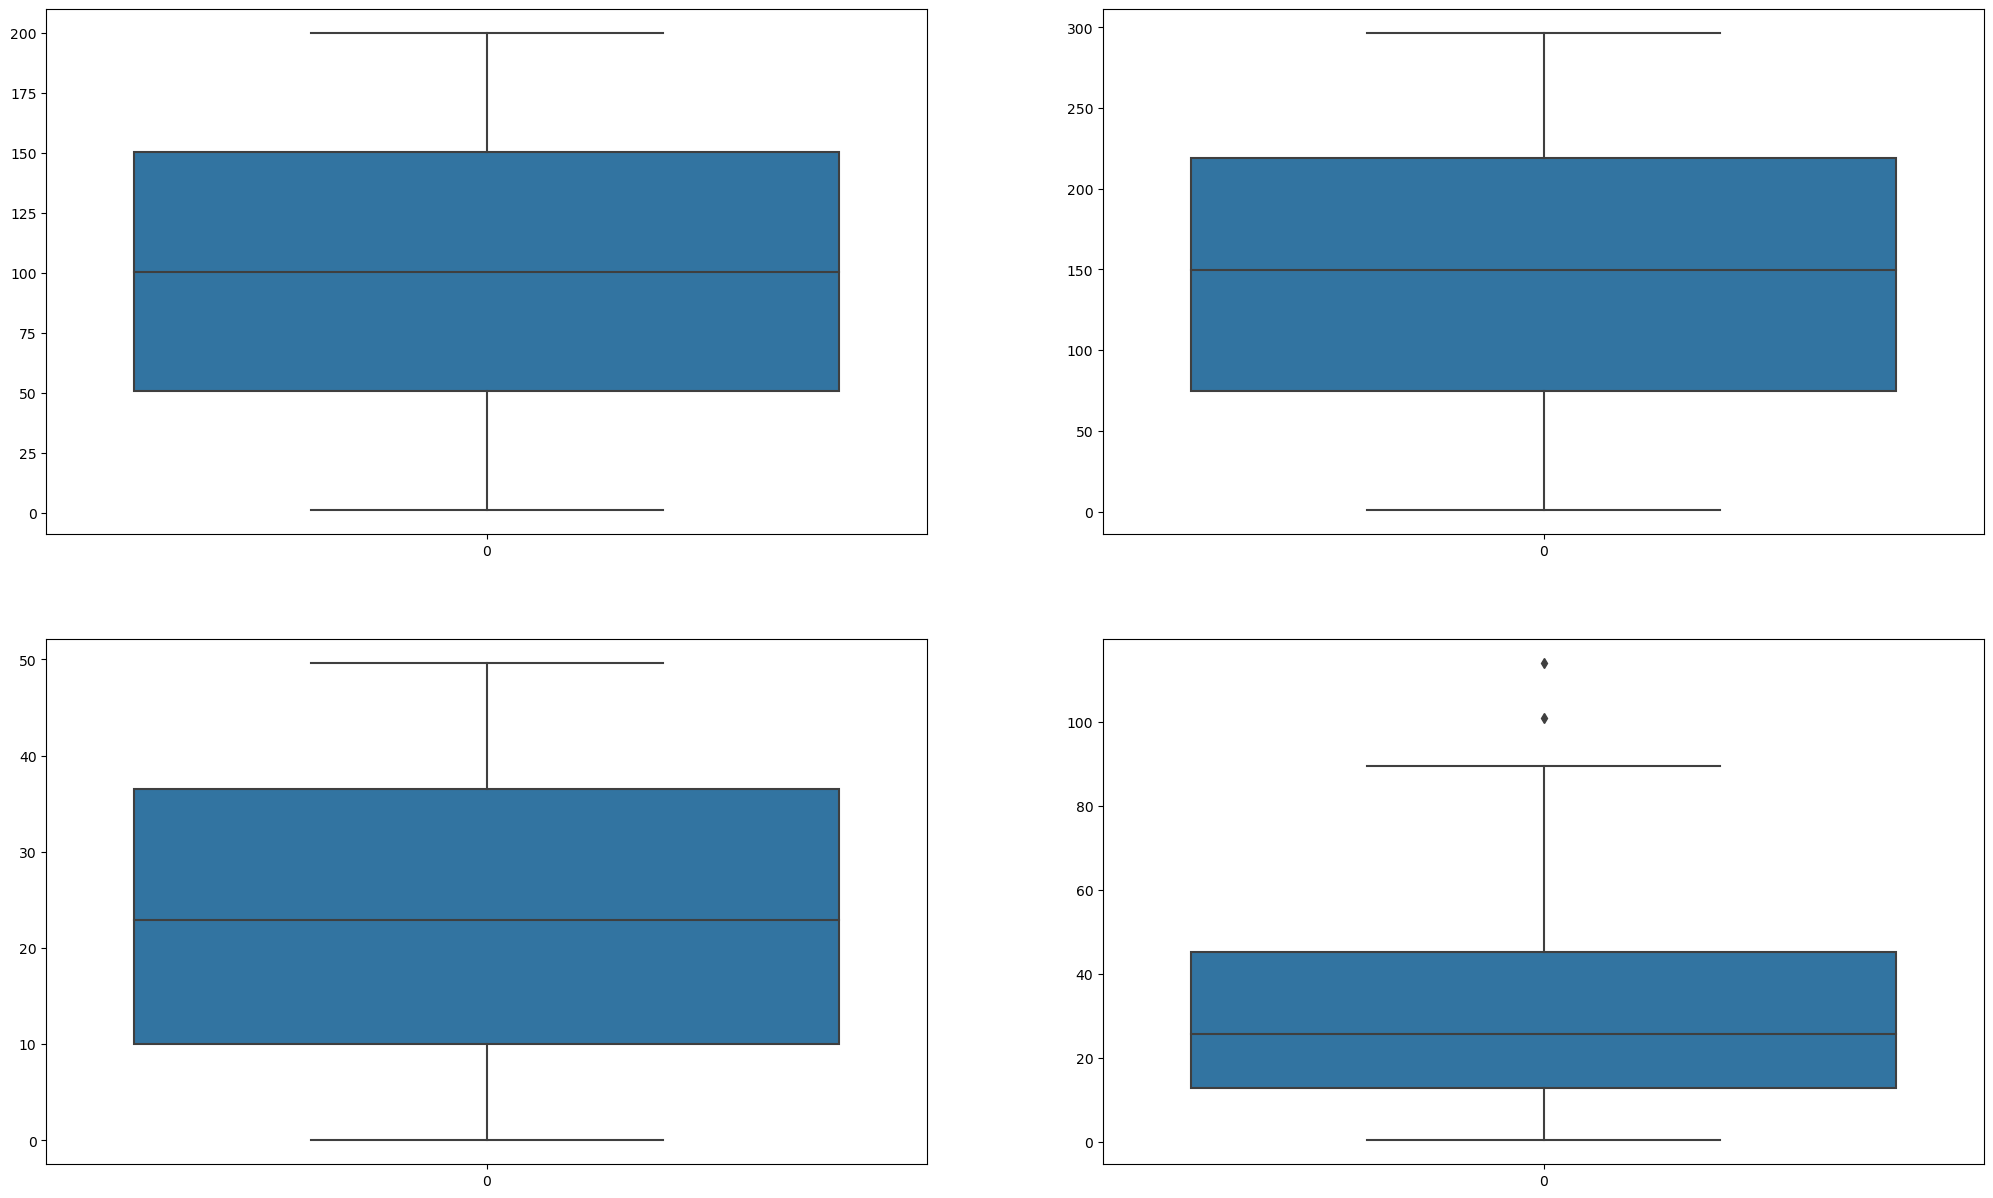

In [29]:
fig,ax = plt.subplots(2,2 ,figsize = (25,15))
for i,subplot in zip(df,ax.flatten()):
    sns.boxplot(df[i],ax = subplot)

* SALES IS HIGHLY COORELATED WITH THE TV

### Lets train our model using linear regression as it is coorelated with only one variable TV

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['TV']], df[['Sales']], test_size = 0.3,random_state=0)

In [81]:
print(X_train)

        TV
131  265.2
96   197.6
181  218.5
19   147.3
153  171.3
..     ...
67   139.3
192   17.2
117   76.4
47   239.9
172   19.6

[140 rows x 1 columns]


In [82]:
print(y_train)

     Sales
131   12.7
96    11.7
181   12.2
19    14.6
153   19.0
..     ...
67    13.4
192    5.9
117    9.4
47    23.2
172    7.6

[140 rows x 1 columns]


In [84]:
print(X_test)

        TV
18    69.2
170   50.0
107   90.4
98   289.7
177  170.2
182   56.2
5      8.7
146  240.1
12    23.8
152  197.6
61   261.3
125   87.2
180  156.6
154  187.8
80    76.4
7    120.2
33   265.6
130    0.7
37    74.7
74   213.4
183  287.6
145  140.3
45   175.1
159  131.7
60    53.5
123  123.1
179  165.6
185  205.0
122  224.0
44    25.1
16    67.8
55   198.9
150  280.7
111  241.7
22    13.2
189   18.7
129   59.6
4    180.8
83    68.4
106   25.0
134   36.9
66    31.5
26   142.9
113  209.6
168  215.4
63   102.7
8      8.6
75    16.9
118  125.7
143  104.6
71   109.8
124  229.5
184  253.8
97   184.9
149   44.7
24    62.3
30   292.9
160  172.5
40   202.5
56     7.3


In [85]:
print(y_test)

     Sales
18    11.3
170    8.4
107    8.7
98    25.4
177   11.7
182    8.7
5      7.2
146   13.2
12     9.2
152   16.6
61    24.2
125   10.6
180   10.5
154   15.6
80    11.8
7     13.2
33    17.4
130    1.6
37    14.7
74    17.0
183   26.2
145   10.3
45    14.9
159   12.9
60     8.1
123   15.2
179   12.6
185   22.6
122   11.6
44     8.5
16    12.5
55    23.7
150   16.1
111   21.8
22     5.6
189    6.7
129    9.7
4     12.9
83    13.6
106    7.2
134   10.8
66     9.5
26    15.0
113   15.9
168   17.1
63    14.0
8      4.8
75     8.7
118   15.9
143   10.4
71    12.4
124   19.7
184   17.6
97    15.5
149   10.1
24     9.7
30    21.4
160   14.4
40    16.6
56     5.5


In [86]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [87]:
res= model.predict(X_test)
print(res)

[[10.48116264]
 [ 9.60152727]
 [11.4524267 ]
 [20.58322509]
 [15.1084112 ]
 [ 9.8855762 ]
 [ 7.70939494]
 [18.31083372]
 [ 8.40119151]
 [16.36372418]
 [19.28209777]
 [11.3058208 ]
 [14.48533615]
 [15.91474363]
 [10.81102591]
 [12.81769409]
 [19.47909945]
 [ 7.3428802 ]
 [10.73314153]
 [17.08759078]
 [20.48701497]
 [13.73856237]
 [15.33290148]
 [13.34455903]
 [ 9.76187747]
 [12.95055569]
 [14.89766523]
 [16.70275031]
 [17.57322281]
 [ 8.46075015]
 [10.41702256]
 [16.42328282]
 [20.17089601]
 [18.38413667]
 [ 7.91555948]
 [ 8.16753836]
 [10.04134496]
 [15.59404323]
 [10.44451117]
 [ 8.45616872]
 [ 9.00135939]
 [ 8.75396194]
 [13.85767966]
 [16.91349628]
 [17.17921947]
 [12.01594311]
 [ 7.70481351]
 [ 8.08507255]
 [13.06967298]
 [12.10299036]
 [12.34122494]
 [17.82520169]
 [18.93849021]
 [15.78188203]
 [ 9.35871126]
 [10.16504368]
 [20.72983099]
 [15.21378419]
 [16.58821446]
 [ 7.64525486]]


In [88]:
model.coef_

array([[0.04581434]])

In [89]:
model.intercept_

array([7.31081017])

In [90]:
0.05473199* 69.2 + 7.14382225

10.931275958

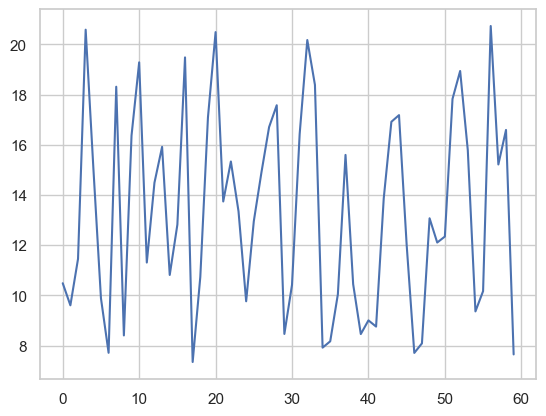

In [94]:
plt.plot(res);

In [36]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 7.14382225 + 0.05473199 * X_test, 'g')
plt.show()

NameError: name 'X_test' is not defined

In [100]:
y_train_pred = model.predict(X_train)
res = (y_train - y_train)
res

,Sales
131,0.0
96,0.0
181,0.0
19,0.0
153,0.0
...,...
67,0.0
192,0.0
117,0.0
47,0.0


In [14]:
data = pd.read_csv("./Desktop/SIP/sales.csv")
df.head()
x=data.drop(['Sales'],axis=1)

In [15]:
y=data['Sales']

In [16]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

In [17]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((160, 3), (40, 3), (160,), (40,))

In [18]:
# Linear Regression Model
import statsmodels.formula.api as sm

lr_model = sm.ols(formula="Sales ~ TV + Radio + Newspaper", data=data).fit()

In [19]:
# Print the coefficients of the linear regression model
print(lr_model.params, "\n")

Intercept    2.938889
TV           0.045765
Radio        0.188530
Newspaper   -0.001037
dtype: float64 



In [20]:
# Print the summary of the linear regression model
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 19 Sep 2023   Prob (F-statistic):           1.58e-96
Time:                        08:15:44   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.0

In [21]:
#MinMax Scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x_train,y_train)

MinMaxScaler()

In [22]:
X_train_scaled = scaler.transform(x_train)
X_test_scaled = scaler.transform(x_test)

In [23]:
from sklearn.linear_model import LinearRegression, Ridge,Lasso

models = [
    ("Linear Regression", LinearRegression()),
    ("Ridge Regression", Ridge()),
]

In [24]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

for name, model in models:
    model.fit(X_train_scaled,y_train)
    y_pred = model.predict(X_test_scaled)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')
    print("")
    print("{}".format(name))
    print("Mean Squared Error: {}".format(mse))
    print("R2 Score: {}".format(r2))
    print("Cross-Validation R2: {}".format(cv_scores.mean()))


Linear Regression
Mean Squared Error: 1.7332927815807722
R2 Score: 0.9184369032278497
Cross-Validation R2: 0.8717418681341064

Ridge Regression
Mean Squared Error: 1.9511229641229473
R2 Score: 0.9081865263455442
Cross-Validation R2: 0.8680637344946384


In [25]:
df1=pd.DataFrame({"Actual":y_test,"Predicted":y_pred})

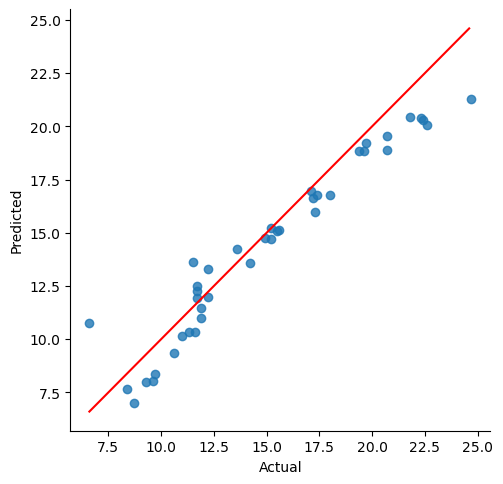

In [26]:
sns.lmplot(x="Actual",y="Predicted",data=df1,fit_reg=False)
d_line=np.arange(df1.min().min(),df1.max().max())
plt.plot(d_line,d_line,color="red",linestyle="-")
plt.show()

## Prediction using test data

In [27]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [32]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size=0.2,random_state=42)

In [34]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd

# Create a dictionary of regression models
regression_models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Gradient Boosting Regressor": GradientBoostingRegressor()
}

# Lists to store evaluation metrics
mse_scores = []
mae_scores = []
r2_scores = []

# Train and evaluate regression models
for model_name, model in regression_models.items():
    model.fit(xtrain, ytrain)
    y_pred = model.predict(xtest)

    # Calculate evaluation metrics
    mse = mean_squared_error(ytest, y_pred)
    mae = mean_absolute_error(ytest, y_pred)
    r2 = r2_score(ytest, y_pred)

    # Append scores to lists
    mse_scores.append(mse)
    mae_scores.append(mae)
    r2_scores.append(r2)

In [35]:
# Create a DataFrame to store the results
regression_scores_df = pd.DataFrame({
    "Algorithm": regression_models.keys(),
    "Mean Squared Error (MSE)": mse_scores,
    "Mean Absolute Error (MAE)": mae_scores,
    "R-squared (R2)": r2_scores
})

# Print the regression scores DataFrame
regression_scores_df

,Algorithm,Mean Squared Error (MSE),Mean Absolute Error (MAE),R-squared (R2)
0,Linear Regression,3.174097,1.460757,0.899438
1,Ridge Regression,3.174095,1.460766,0.899438
2,Lasso Regression,3.143692,1.452202,0.900401
3,Decision Tree Regressor,2.201500,1.035000,0.930252
4,Random Forest Regressor,0.622190,0.663750,0.980288
5,Gradient Boosting Regressor,0.542312,0.619796,0.982818


In [28]:
TV= float(input("Enter the TV value: "))
Radio = float(input("Enter the Radio value: "))
Newspaper= float(input("Enter the Newspaper value: "))

new_data = pd.DataFrame({
    "TV": [TV],
    "Radio": [Radio],
    "Newspaper": [Newspaper]
})

print("-------------------------------------")
new_pred = lr.predict(new_data)
print("Predicted Sales : {}".format(abs(new_pred)))

Enter the TV value: 44.5
Enter the Radio value: 39.3
Enter the Newspaper value: 45.1
-------------------------------------
Predicted Sales : [12.24450713]


#### Concluding with saying that above mention solution is successfully able to predict the sales using advertising platform datasets